<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [1]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [2]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [3]:
X,y

(array([[ 0.44263251, -0.6504767 ],
        [ 0.33077673, -0.66603596],
        [-0.90087143,  0.49915711],
        ...,
        [-0.41801304,  0.67072819],
        [-0.37166152, -0.90856751],
        [ 0.45899206,  0.93702312]]),
 array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 

In [4]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,0.442633,-0.650477,1
1,0.330777,-0.666036,1
2,-0.900871,0.499157,0
3,0.727341,0.070954,1
4,0.771571,-0.104292,1


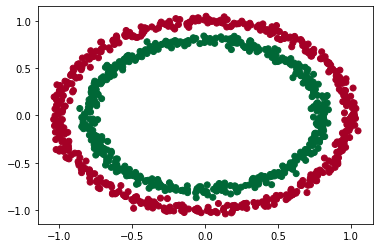

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [6]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0  0.442633 -0.650477
 1  0.330777 -0.666036
 2 -0.900871  0.499157
 3  0.727341  0.070954
 4  0.771571 -0.104292, 0    1
 1    1
 2    0
 3    1
 4    1
 Name: Label, dtype: int64)

In [7]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [8]:


import tensorflow as tf

In [9]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 4.2672 - accuracy: 0.4663
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4462
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1545 - accuracy: 0.4300
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0957 - accuracy: 0.4225
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0745 - accuracy: 0.4162
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0435 - accuracy: 0.4150
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0338 - accuracy: 0.4137
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9766 - accuracy: 0.4112
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9244 - accuracy: 0.4112
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9211 - accuracy: 0.4087
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [10]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2577 - accuracy: 0.4575
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0005 - accuracy: 0.4663
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6994 - accuracy: 0.4725
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5152 - accuracy: 0.4787
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.4735 - accuracy: 0.4800
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 3.4019 - accuracy: 0.4812
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.3172 - accuracy: 0.4812
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.2444 - accuracy: 0.4825
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.0376 - accuracy: 0.4863
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 2.8866 - accuracy: 0.4837
Epoch 11/

In [11]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 2.7193 - accuracy: 0.4500
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.5188
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5250
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4988
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4638
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5075
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4888
Epoch 11/

In [12]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4500


[0.7002224922180176, 0.44999998807907104]

In [13]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [14]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.4975
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5188
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5275
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5325
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5325
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5362
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5412
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5425
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5400
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5425
Epoch 11/

In [15]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9950


[0.09034980088472366, 0.9950000047683716]

In [16]:
# lets try that model to learn faster.

In [17]:
tf.random.set_seed(42)
# create a model
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#fit the model
history_5=model_5.fit(X_train,y_train,epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5163
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5125
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5612
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6263
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6350
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7150
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7412
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7900
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8100
Epoch 11/25
25/25 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9950


[0.03995377570390701, 0.9950000047683716]

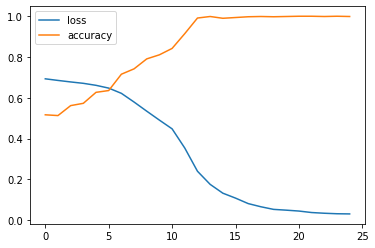

In [18]:
pd.DataFrame(history_5.history).plot()
model_5.evaluate(X_test,y_test)


**Learning Rate effect:**

So just by increasing the learning rate by 10% we are able to trian the model in 1/10th of epochs. 



#Confusion matrix

In [19]:
y_pred = model_5.predict(X_test)

model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9950


[0.03995377570390701, 0.9950000047683716]

In [20]:
tf.math.confusion_matrix(y_test,y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[102,   0],
       [ 98,   0]], dtype=int32)>

Now this is showing very high false negative case. However accuracy is quite high

**Are we missing some thing?**

In [21]:
y_pred, y_test


(array([[6.80088997e-04],
        [3.20592523e-03],
        [9.78380084e-01],
        [6.72984123e-03],
        [9.60068703e-01],
        [9.66967344e-02],
        [1.92278624e-03],
        [9.48053479e-01],
        [9.96348143e-01],
        [9.84948099e-01],
        [2.77233124e-03],
        [1.06672347e-02],
        [9.93015409e-01],
        [9.89714265e-03],
        [9.62647438e-01],
        [6.46948814e-04],
        [9.46549892e-01],
        [4.98447120e-02],
        [9.32006359e-01],
        [9.00455236e-01],
        [8.74790192e-01],
        [7.74782896e-03],
        [9.81132984e-01],
        [9.78798032e-01],
        [1.24126673e-04],
        [5.80609143e-01],
        [7.25113809e-01],
        [9.71135020e-01],
        [4.01926041e-03],
        [2.31817365e-03],
        [4.89240885e-03],
        [3.73411477e-02],
        [6.63276951e-05],
        [9.96341348e-01],
        [2.72115469e-02],
        [1.69605017e-04],
        [9.96224642e-01],
        [4.80885828e-05],
        [5.7

So one is having probability and other is in binary. Cool

In [22]:
y_pred = tf.round(y_pred)
y_pred

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
 

In [23]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[101,   1],
       [  0,  98]], dtype=int32)>

Now it make sense

#Lets work on larger data sets
* work on fashion data set from keras for multiclass classificaiton

In [24]:
import tensorflow as tf

fashion_data = tf.keras.datasets.fashion_mnist
# Data is already split in train and test 
(X_train,y_train),(X_test ,y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


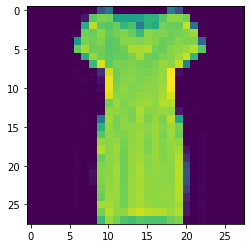

label : 3


In [25]:
import matplotlib.pyplot as plt

plt.imshow(X_train[20])
plt.show()

print("label : {}".format(y_train[20]))



In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
# Lets check the shape of training data.

X_train[0].shape

(28, 28)

In [28]:
# Lets buid the model .

#set random seed 

tf.random.set_seed(42)

# Crete a model

model_6=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_6.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5708 - accuracy: 0.3175
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5638 - accuracy: 0.3280
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.543

In [29]:
# very less accuracy . check the input data.

X_train.max(),X_train.min()



(255, 0)

In [30]:
#So the inpt data is rangin from 255 to 0. Lets scale or normalize the data.

X_train_norm=X_train/255
X_test_norm=X_test/255

X_train_norm.max() ,X_test_norm.min()

(1.0, 0.0)

In [31]:
# Great now its between 0 to 1 .

# Lets create model
tf.random.set_seed(42)

#create a model
model_7=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

#Compile the model

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_norm = model_7.fit(X_train_norm,y_train, epochs=20, validation_data=(X_test_norm,y_test))


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

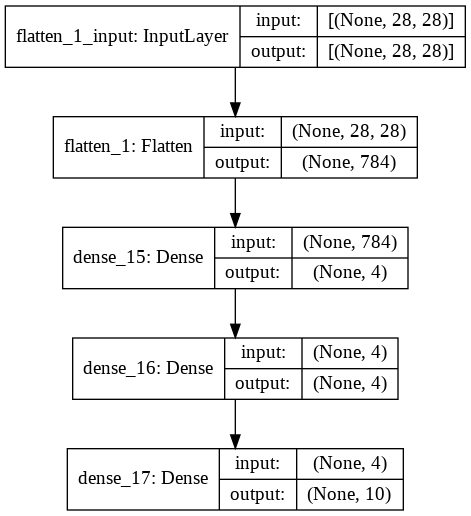

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)